# Regresión logística

En este cuaderno desarrollamos un modelo de regresión logística para predecir enfermedades del corazón. A partir de datos biométricos de 304 pacientes, algunos de ellos con enfermedades cardiacas y otros sanos, se desea desarrollar un modelo de regresión logística para relacionar la enfermedad con los dato biométricos.

El objetivo es anticipar si un paciente va a desarrollar una enfermedad del corazón a partir de sus datos biométricos.



In [1]:
# Importar librerías

import numpy as np # Algebra lineal
import pandas as pd # Manipular datos
import seaborn as sns # Gráficos
import matplotlib.pyplot as plt # Gráficos


# Cargar datos y explorarlos

## Descripción de las columnas
* age, in years
* sex, (1 = male; 0 = female)
* cp, chest pain type
* trestbps, resting blood pressure (in mm Hg on admission to the hospital)
* chol, serum cholestoral in mg/dl
* fbs, (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg, resting electrocardiographic results
* thalach, maximum heart rate achieved
* exang, exercise induced angina (1 = yes; 0 = no)
* oldpeak, ST depression induced by exercise relative to rest
* slope, the slope of the peak exercise ST segment
* ca, number of major vessels (0-3) colored by flourosopy
* thal, Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target, 1=disesase, 0=healthy


In [2]:
# Leer el fichero excel previamente almacenado en Drive
#ruta="/content/drive/MyDrive/Multivariante/04 Regresion Logistica/Heart.xlsx"
ruta='/content/Heart.xlsx'

df = pd.read_excel(ruta)

## Algunos comando prácticos para explorar el contenido del DataFrame

`df`  Imprime los primeros y los últimos registros

`df.info()`Informa sobre la estructura del DataFrame

`df.describe()` Principales parámetros de las variables (de las columnas del DataFrame)

`df.isnull().sum()`Comprobar que no hay valores perdidos (missings)



In [ ]:
# Visualizar los primeros y los últimos registros
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Estructura de los datos importados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Descripción de los parámetros principales de las variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Visualizar si en el DataFrame hay valores missing
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Una librería especial: `pandas-profiling`

`Pandas profiling` es una librería que nos ayuda a explorar los datos de un DataFrame.

Antes de importarla en necesario instalarla



In [ ]:
# Instalar pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 24.8 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=22bd4af5bc5b824e752aba41b0515bee079f8124b6bff3f38dd1dcc09f8538d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-gsb_aau7/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0f911eccb1b42ae5fd0a0704c7c465f2baf3db4593143004d3a7ccfc7422aa7e
  Stored in directory

In [ ]:
# Importar la librería
import pandas_profiling as pp
pp.ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

## Preprocesar las variables categóricas

El conjunto de datos contiene cuatro variables categóricas que tienen la apariencia de variables numéricas
Las variables categóricas son:

* cp - chest_pain_type
* restecg - rest_ecg_type
* slope - st_slope_type
* thal - thalassemia_type

Los valores numéricos que toman estas variables se refieren a los valores de las categorías. No tiene sentido tratar esas variables como si fueran numéricas. Es necesario reconvertirlas en variables dicotómicas (0,1) como por ejemplo se hace con a variable sexo, que puede tomar los valores 0 y 1 (Si tuvieramos que utilizar una variable con más de dos sexos, habría que hacer lo mismo que vamos a hacer con las variables categóricas)




In [ ]:
# Cambiamos el nombre de las columnas
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [ ]:
# Sustituimos el valor numérico por la categoría de ese valor numérico
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [ ]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,1,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,normal,123,1,0.2,flat,0,reversable defect,0
299,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,0,reversable defect,0
300,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,2,reversable defect,0
301,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1,reversable defect,0


### Convertir automáticamente las variables categóricas en variables dummy

Para ello creamos una nueva variable para cada categoría y asignamos a cada observación el valor 0 si no tiene esa categoría y eñ valor 1 si tiene esa categoría

No obstante hay que llevar cuidado con esta sentencia ya que hay que eliminar una de las dummy para evitar la colinealidad
Para ello hay que indicar expresamente el parámetro `drop_first=True`. Con esta opción eliminamos la primera categoría de la variable

In [ ]:
# Crear las nuevas variable dummy (por defecto la primera no la considera)
data = pd.get_dummies(df, drop_first=True)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [ ]:
data

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,1,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,0,0,1,1,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,1,0,1,1,0,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,0,0,0,0,1,1,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,0,0,0,0,1,1,0,0,0,1


In [ ]:
# Separar la variable "target"

x = data.drop('target', axis = 1)
y = data['target']

# Regresión logística son `sklearn`

En este apartado hacemos lo siguiente:

* Importar el módulo que necesitamos de la librería `sklearn`
* Instanciar un modelo de Regresión Logística y ajustar el modelo a los datos
* Calcular las betas del modelo
* Guardar las predicciones del modelo en el vector `y_pred`. El modelo predice la probabilidad de pertenecer a la clase 1, es decir, la probabilidad estar enfermo del corazón de cada paciente



In [ ]:
# importar librerías de sk learn y ajustar el modelo

from sklearn.linear_model import LogisticRegression


In [ ]:
# Instanciar el modelo y ajustarlos datos

#mi_modelo=LogisticRegression(solver='liblinear',max_iter=500)
mi_modelo=LogisticRegression(solver='lbfgs',max_iter=2000)
mi_modelo.fit(x,y)


LogisticRegression(max_iter=2000)

In [ ]:
# Obtener beta_0
beta0=mi_modelo.intercept_
beta0

array([1.62488566])

In [ ]:
# Calcular el resto de betas
coef=mi_modelo.coef_
coef

array([[ 0.00189224, -1.09150532, -0.01409511, -0.00383803,  0.1742892 ,
         0.01849159, -0.77588716, -0.43454524, -0.76834969,  0.66167919,
         1.43533998,  1.26408509, -0.22033665,  0.28323815, -0.53067864,
         0.2250898 ,  0.52524361, -0.24539286, -0.8655919 ]])

In [ ]:
# Crear un DataFrame con las betas de cada variable
betas=pd.DataFrame(coef.ravel(),x.columns)
betas.columns = ['Betas'] # Poner el nombre "Betas" a la columna
betas.sort_values(by=['Betas'],inplace=True,ascending=False) # Ordenar
betas

,Betas
chest_pain_type_non-anginal pain,1.435340
chest_pain_type_typical angina,1.264085
chest_pain_type_atypical angina,0.661679
thalassemia_type_normal,0.525244
rest_ecg_type_normal,0.283238
st_slope_type_upsloping,0.225090
fasting_blood_sugar,0.174289
max_heart_rate_achieved,0.018492
age,0.001892
cholesterol,-0.003838


In [ ]:
# Guardar la predicciones (ceros y unos )
y_pred=mi_modelo.predict(x)

## Validación del modelo

Una vez calculado el modelo, es necesario validar que los resultados obtenidos son razonables

Para ello contamos con varias métricas

* Precision, recall y f1-score
* Mariz de confusión
* Curva ROC (receiver operating characteristic) y area bajo la curv

In [ ]:
# Precision, recall f1-score
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.80      0.84       138
           1       0.85      0.92      0.88       165

    accuracy                           0.86       303
   macro avg       0.87      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303



[[111  27]
 [ 14 151]]


<Axes: >

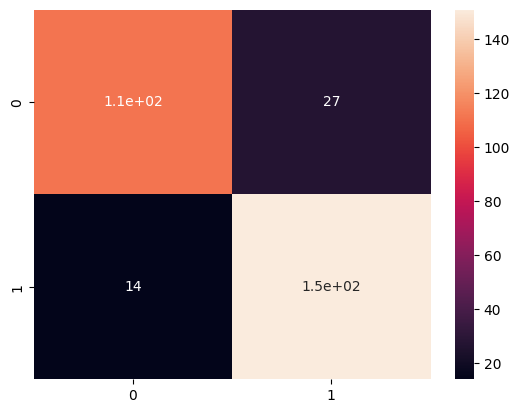

In [ ]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))
sns.heatmap(confusion_matrix(y,y_pred),annot=True)

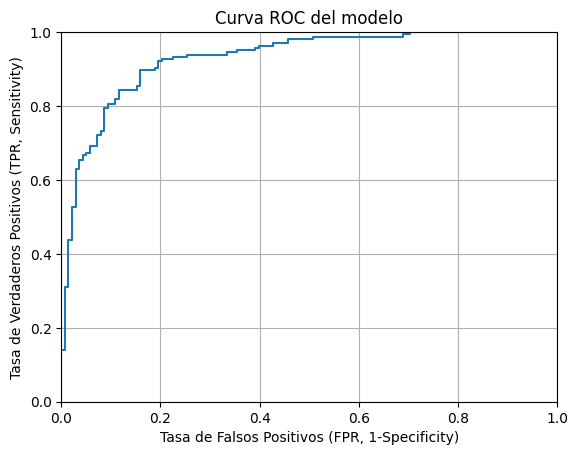

In [ ]:
# Curva ROC

#Guardar las probabilidades
p=mi_modelo.predict_proba(x)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, p)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC del modelo')
plt.xlabel('Tasa de Falsos Positivos (FPR, 1-Specificity)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR, Sensitivity)')
plt.grid(True)

In [ ]:
# Area bajo la curva ROC (auc)
import sklearn
sklearn.metrics.roc_auc_score(y,y_pred)

0.8597496706192359

# Regresión logística con `statsmodels`

Repetimos el mismo proceso pero con `statsmodels`



In [ ]:
# Importar la librería
import statsmodels.api as sm

# Añadir una columna de unos a los datos
x1 = sm.add_constant(x)

# definir el modelo y ajustar los datos
log_reg = sm.Logit(y, x1).fit()




Optimization terminated successfully.
         Current function value: 0.332828
         Iterations 7


In [ ]:
# Imprimir un resumne de resultados
print(log_reg.summary())


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           19
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.5171
Time:                        18:37:36   Log-Likelihood:                -100.85
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.239e-35
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.6385      3.506      0.753      0.452      -4.234       9.511
age                                

* coef : the coefficients of the independent variables in the regression equation.
* Log-Likelihood : the natural logarithm of the Maximum Likelihood
* Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
* LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
* Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

In [ ]:

y_pred2 = log_reg.predict(x1)
prediccion = list(map(round, y_pred2))

# comparing original and predicted values of y
print('Valores reales:', list(y.values))
print('Predicciones : ', prediccion)


Valores reales: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicciones :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:

from sklearn.metrics import (confusion_matrix,
						accuracy_score)

# Matriz de confusion
cm = confusion_matrix(y, prediccion)
print ("Matriz de confusion : \n", cm)

# accuracy
print('Accuracy = ', accuracy_score(y, prediccion))


Matriz de confusion : 
 [[111  27]
 [ 14 151]]
Accuracy =  0.8646864686468647
